In [1]:
import re
import datetime

import pandas as pd
from scipy import stats
import numpy as np
from numpy.polynomial import Polynomial
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [34]:
# Load data as pd.DataFrame
df = pd.read_csv("college_email_data.csv", sep=", ", engine="python", parse_dates=["date_time"])
df.head()

,university,date_time,type
0,New York University,2022-04-26 11:36:00,Event
1,Wake Forest Summer Immersion Program,2022-04-25 08:30:00,Event
2,Hofstra University,2022-04-25 08:55:00,Marketing
3,Case Western Reserve University,2022-04-25 12:46:00,Event/Marketing
4,Pace University,2022-04-25 11:42:00,Marketing


In [35]:
# Create bins based on hour of the day
# 0 = 12:00am -> 12:59am, 1 = 1:00am -> 1:59am, etc. 
bins = {i: 0 for i in range(24)}
for dt in df["date_time"]:
    bins[dt.hour] += 1

binned_data = pd.DataFrame(columns=["hour", "frequency"])
binned_data["hour"] = list(bins.keys())
binned_data["frequency"] = list(bins.values())
binned_data

,hour,frequency
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,0
6,6,0
7,7,3
8,8,8
9,9,5


In [29]:
# Run Chi-Square GOF test for binned data

chisq, p = stats.chisquare(binned_data.frequency)
print(f"Chi-Square Value: {chisq}")
print(f"p Value: {p}")

Chi-Square Value: 85.33333333333334
p Value: 4.257179892796128e-09


Text(0.5, 1.0, 'College Email Data')

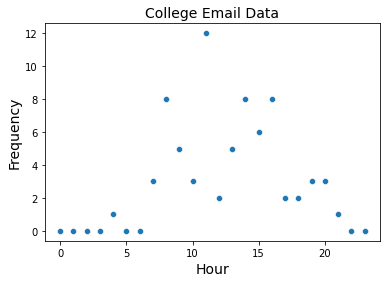

In [45]:
# Make scatter plot of data
fontsize = 14

sns.scatterplot(x=binned_data.hour, y=binned_data.frequency)
plt.xlabel("Hour", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.title("College Email Data", fontsize=fontsize)


Text(0.5, 1.0, 'College Email Data (4th Order Polynomial Fit)')

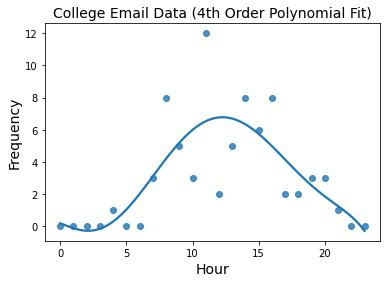

In [47]:
# Create 6th order regression plot for the data
deg = 6
sns.regplot(x=binned_data.hour, y=binned_data.frequency, order=deg, ci=None)
plt.xlabel("Hour", fontsize=fontsize)
plt.ylabel("Frequency", fontsize=fontsize)
plt.title("College Email Data (4th Order Polynomial Fit)", fontsize=fontsize)

In [33]:
# Get results of model utility test

model = Polynomial.fit(binned_data.hour, binned_data.frequency, deg=deg).convert()

results = smf.ols(formula="frequency ~ model(hour)", data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              frequency   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     31.62
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.18e-05
Time:                        13:07:37   Log-Likelihood:                -51.770
No. Observations:                  24   AIC:                             107.5
Df Residuals:                      22   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.693e-14      0.695   8.19e-14      1.000      -1.442       1.442
model(hour)     1.0000      0.178      5.623      0.000       0.631       1.369
==============================================================================
Omnibus:                        3.350   Durbin-Watson:                   2.738
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                1.697
Skew:                           0.412   Prob(JB):                        0.428
Kurtosis:                       4.009   Cond. No.                         6.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""